## Define Business Goal :
In this project, we will build a text classification model on song lyrics. The task is to predict the artist from a piece of text. To train such a model, you first need to collect your own lyrics dataset:
* Download a HTML page with links to songs
* Extract hyperlinks of song pages
* Download and extract the song lyrics
* Vectorize the text using the Bag Of Words method
* train a classification model that predicts the artist from a piece of text
* refactor the code into functions
* Write a simple command-line interface for the program
* upload your code to GitHub
#### Workflow
1) Download the lyrics in `txt` files (cleaned - web scraping)
2) Transform lyrics to a matrix (Bag of Words)
3) Train a model and save the trained model on your hard drive
4) Write a Python program for the prediction

![nuri](week4_project.png)

In [1]:
import pandas as pd
import numpy as np
#ploting
import seaborn as sns
import matplotlib.pyplot as plt
#Web Scraping and time timer 
import requests
import time 
from bs4 import BeautifulSoup
# oprastin system mangment File
import os
#Regex in python
import re
# Split Data
from sklearn.model_selection import train_test_split,GridSearchCV
#feature_extraction
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
# Feature Engineering 
from sklearn.compose import ColumnTransformer
#modle
from sklearn.dummy import DummyClassifier
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier   
#Evaluate model
from sklearn import metrics 
from sklearn.metrics import classification_report, r2_score,mean_squared_error,mean_absolute_error, mean_squared_log_error,confusion_matrix
#Model Save
import joblib as jb

##  discrbtion of the projuct stepes

##### initialization the name of the artists one and Tow

##### Scraping the artist to git all the lyrics URLs:
##### Do that:
* clear vision about what do u want to Scraping and the Data that u want to have .
* Recpict the siervier by gif it rest Time.
* save your file in orgizing way 
##### Do'not do that:
* make a dictionary to filter the duplicates by the name of the song.




##### Scraping all the artist lyrics links one by one :
##### Do that:
* Act like humen .
* Recpict the siervier by gif it rest Time.
* save your file in orgizing way.
* clean and git all the artist lyrics in one list.
* make some if statement to devoid problems each as (empty lyrics content .etc).
##### Do'not do that:
* do'not ( Scraping --> BeautifulSoup--> save ) do ( Scraping --> save -->BeautifulSoup) safe and fast


### Save lyrics List 

### Split Data to (Train-Validation"Test")

##### Do that:
* when you use CountVectorizer you have to fit the data with x_tran as arry not as DataFrame
##### Do'not do that:
* do'not ( CountVectorizer --> Split ) do ( Split --> CountVectorizer) .
* do'not  fit x_test just transform.



### Useing pipeline with TF-IDF by different method

Score train: 0.9285714285714286
Score test: 0.9553571428571429


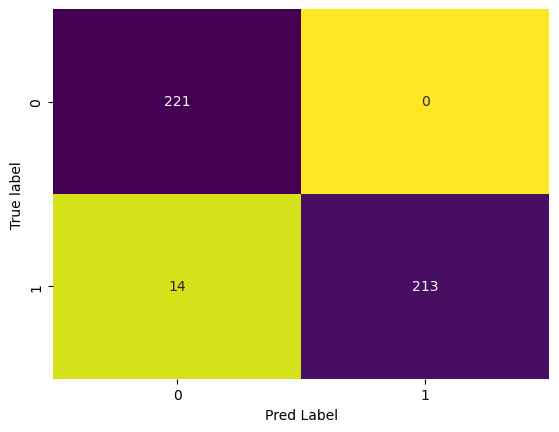

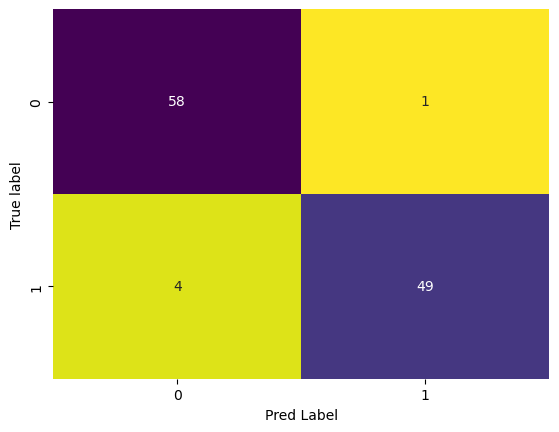

In [ ]:
plot_confusion_matrix(confusion_matrix(y_train,(pipeline.predict(x_train[0].values))))
print(f'Score train: {pip_R_Forest.score(x_train[0].values,y_train)}')
plot_confusion_matrix(confusion_matrix(y_test,(pipeline.predict(x_test[0].values))))
print(f'Score test: {pipeline.score(x_test[0].values,y_test)}')

## Get the Data

### Finctions 

In [180]:
# this calss for web Scraping lyrics in https://www.lyrics.com by the artist page
class Scraping:
    
    def __init__(self,artist_name):
        self.web_URL='https://www.lyrics.com'
        self.artist_name=artist_name
        self.artist_link=self.web_URL+artist_link[artist_name]
    
#Scraping the artist to git all the lyrics URLs    
    def request_artist_page(self):
        self.lyrics_URL_dictionary={}
        response = requests.get(self.artist_link)
        artist_page = BeautifulSoup(markup=response.text,features="html.parser")
        artist_lyrics_Urls=artist_page.find_all(name="a", href=True)
        lyrics_dict={}
        for lyrics_Url in artist_lyrics_Urls:
            if lyrics_Url['href'].startswith('/lyric') :#and self.artist_name in  lyrics_Url['href']:
                self.lyrics_URL_dictionary[lyrics_Url.text] = self.web_URL+ lyrics_Url['href']# make a dictionary to filter the duplicates by the name of the song 
        return  self.lyrics_URL_dictionary
    
#Scraping all the artist lyrics links one by one 
    def request_artist_lyrics_pages(self,lyrics_URL_dictionary):
        self.art_lyrics_list=[]
        
        for n, url in enumerate(lyrics_URL_dictionary.values()):
            head = {'User-agent': 'Mozilla/5.0 (X11; Linux i686; rv:2.0b10) Gecko/20100101 Firefox/4.0b10'}
            lyrics_response = requests.get(url, headers=head)
            with open(f'{self.artist_name}_{n}.txt', 'w') as my_file:
                my_file.write(lyrics_response.text)
            time.sleep(np.random.random())  # waiting time in seconds     
            # clean and git all the artist lyrics in one list
            # make if stitment to devoide the empty lyrics content            
            with open(file=f'{self.artist_name}_{n}.txt',mode= 'r') as my_file:
                #lyrics_html_read = file.read()
                lyrics_soup = BeautifulSoup(markup=my_file.read(),features="html.parser")
                lyrics_text=lyrics_soup.find(name="pre",attrs={"id":"lyric-body-text"})
                if lyrics_text:
                    self.art_lyrics_list.append(lyrics_text.get_text())
        return  self.art_lyrics_list

In [181]:
def plot_confusion_matrix(confusion_matrix):
    """It plots the confusion matrix as heatmap
    
    Parameters:
    ----------
    confusion_matrix: numpyarray
    """
    fig, ax = plt.subplots()
    sns.heatmap(
        confusion_matrix, 
        annot=True, fmt = "d",
        cbar=False, cmap="viridis_r", 
        ax=ax
    )
    ax.set_ylabel("True label")
    ax.set_xlabel("Pred Label");

### Run this code

In [3]:
artist_name=('whitney_Houston','Bob_Marley')
artist_link={'whitney_Houston':'/artist/Whitney-Houston/4519','Bob_Marley':'/artist/Bob-Marley/2907'}

#### Artist _one

In [4]:
artist=Scraping('whitney_Houston')

In [5]:
lyrics_URLs=artist.request_artist_page()

In [6]:
artist_1_list=artist.request_artist_lyrics_pages(lyrics_URLs)

In [7]:
len(artist_1_list)

#### Artist _Two

In [8]:
artist=Scraping('Bob_Marley')

In [9]:
lyrics_URLs=artist.request_artist_page()

In [10]:
artist_2_list=artist.request_artist_lyrics_pages(lyrics_URLs)

In [11]:
len(artist_2_list)

In [12]:
artists_lyrics_list=artist_1_list+artist_2_list[0:280]

In [13]:
len(artists_lyrics_list)

### Save lyrics List 

In [14]:
jb.dump(artists_lyrics_list,'Saved_artists_lyrics_list.sav');

In [60]:
artists_lyrics_list_jb=jb.load('Saved_artists_lyrics_list.sav')

## Split Data to (Train-Validation"Test")

In [61]:
artists_lyrics_list_DF=pd.DataFrame(artists_lyrics_list_jb)
artists_lyrics_list_DF.shape

(560, 1)

In [62]:
#x = x_bow_sklearn.copy()
y= pd.Series([1] * int(len (artists_lyrics_list_jb)/2) + [0] * abs (len(artists_lyrics_list_jb)-int(len(artists_lyrics_list_jb)/2)))
len(y)

560

In [63]:
x_train, x_test, y_train, y_test = train_test_split(artists_lyrics_list_DF,y, test_size = 0.2,random_state=10000)
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((448, 1), (448,), (112, 1), (112,))

In [84]:
type (x_train[0])

pandas.core.series.Series

In [65]:
type (x_test[0].values)

numpy.ndarray

##  useing Sklearn CountVectorizer

* if I make CountVectorizer for the training site and test manual it will be broken because it is making a different number of features in each of them
* please make only transform for x_test to have the same features as x_train when we predict

In [66]:
vectorizer = CountVectorizer(lowercase=True, stop_words='english', token_pattern='[A-Za-z]+', ngram_range=(1,1))
x_cv= vectorizer.fit_transform(x_train[0].values)#note here that vectorizer.fit alywse take arry or list not DataFram
x_cv_train= pd.DataFrame(x_cv.toarray(), columns=vectorizer.get_feature_names_out())
x_cv_train.shape

(448, 3126)

In [67]:
y_train.shape

(448,)

In [68]:
x_cv_t = vectorizer.transform(x_test[0].values)#note here that vectorizer.fit alywse take arry or list not DataFram
x_cv_test= pd.DataFrame(x_cv_t.toarray(), columns=vectorizer.get_feature_names_out())
x_cv_test.shape

(112, 3126)

In [69]:
logreg_cv = LogisticRegression()

In [70]:
logreg_cv.fit(x_cv_train, y_train)

LogisticRegression()

In [71]:
logreg_cv.score(x_cv_train, y_train)

1.0

In [72]:
logreg_cv.predict(x_cv_test)

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [73]:
logreg_cv.predict_proba(x_cv_test);

Score train: 1.0
Score test: 0.9642857142857143


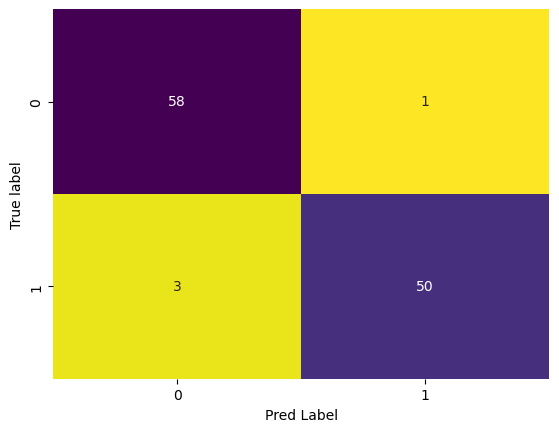

In [75]:
print(f'Score train: {logreg_cv.score(x_cv_train,y_train)}')
print(f'Score test: {logreg_cv.score(x_cv_test,y_test)}')
plot_confusion_matrix(confusion_matrix(y_test,(logreg_cv.predict(x_cv_test))))

##  Useing pipeline with TF-IDF by different method
$$\text{tf-idf}(t_i,d_j) = \frac{f_{t_i,d_j}}{\sum_{t'\in d_j}f_{t',d_j}} \cdot \Bigl(\log\Bigl[{\frac{N+1}{n_t + 1}\Bigr]+1}\Bigr)$$

In [154]:
# Create a model pipeline with TfidfVectorizer  with RandomForestClassifier 
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', token_pattern='[A-Za-z]+', ngram_range=(1,1))
model=RandomForestClassifier(n_estimators=120, max_depth=4)
pip_R_Forest = make_pipeline(tfidf,model)

In [155]:
pip_R_Forest.fit(x_train[0].values,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words='english',
                                 token_pattern='[A-Za-z]+')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=4, n_estimators=120))])

In [186]:
pip_R_Forest.score(x_train[0].values,y_train)

0.9285714285714286

In [187]:
pip_R_Forest.predict(x_test[0].values)

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [158]:
pip_R_Forest.predict_proba(x_test[0].values);

In [159]:
pip_R_Forest.score(x_test[0].values,y_test)

0.8928571428571429

#### Ploting RandomForestClassifier

Score train: 0.9285714285714286
Score test: 0.9553571428571429


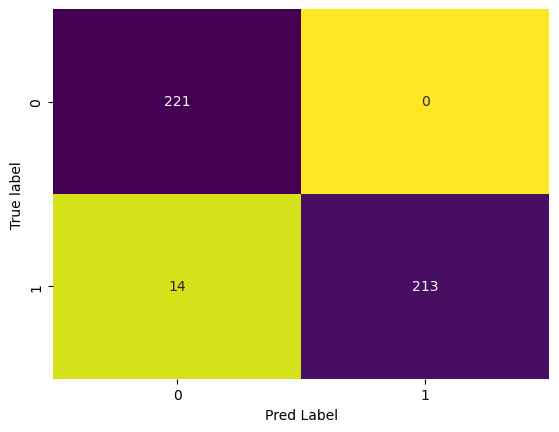

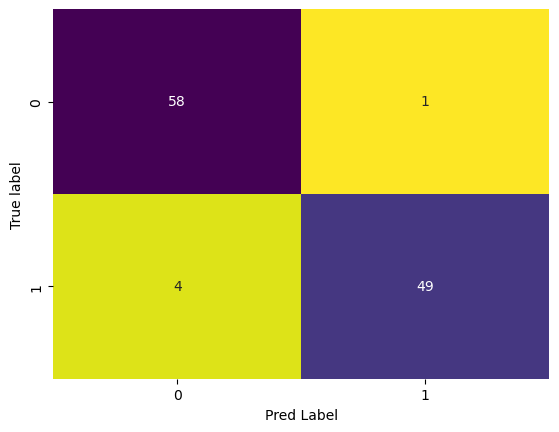

In [176]:
plot_confusion_matrix(confusion_matrix(y_train,(pipeline.predict(x_train[0].values))))
print(f'Score train: {pip_R_Forest.score(x_train[0].values,y_train)}')
plot_confusion_matrix(confusion_matrix(y_test,(pipeline.predict(x_test[0].values))))
print(f'Score test: {pipeline.score(x_test[0].values,y_test)}')